In [5]:
import pandas as pd
import numpy as np

In [6]:
data=pd.read_csv('labeled_data.csv')

In [7]:
data

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [8]:
import spacy

In [9]:
nlp=spacy.load('en_core_web_sm')

In [10]:
data['vectors']=data['tweet'].apply(lambda text: nlp(text).vector)

In [11]:
data

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,vectors
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,"[0.055582713, -0.042530783, 0.042702153, -0.43..."
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,"[-0.1049191, -0.014938958, 0.31508774, 0.03801..."
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,"[0.05711911, 0.15318444, 0.20642522, -0.139701..."
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,"[-0.45472732, 0.08733691, 0.24565922, -0.15005..."
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,"[-0.22218423, -0.04772623, -0.012126422, -0.17..."
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,"[0.016572017, -0.1874037, -0.20799282, -0.2798..."
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...","[0.17651609, -0.042492453, 0.2594752, -0.15687..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,"[0.33006212, 0.14599828, 0.5940392, -0.2671263..."
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,"[0.32854703, 0.25559494, -0.1370971, -0.125626..."


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X=np.stack(data['vectors'])

In [14]:
y=np.stack(data['class'])

In [15]:
X

array([[ 0.05558271, -0.04253078,  0.04270215, ..., -0.45091718,
         0.21365292,  0.1460895 ],
       [-0.1049191 , -0.01493896,  0.31508774, ...,  0.315297  ,
         0.7240102 ,  0.5421549 ],
       [ 0.05711911,  0.15318444,  0.20642522, ..., -0.14333464,
         0.73950684,  0.44316432],
       ...,
       [ 0.33006212,  0.14599828,  0.5940392 , ...,  0.5644169 ,
         0.36820376,  0.48571435],
       [ 0.32854703,  0.25559494, -0.1370971 , ...,  0.63152367,
         0.13302638, -0.19725028],
       [ 0.29283085,  0.3243029 , -0.05002825, ..., -0.15942428,
         0.06193215,  0.19343287]], dtype=float32)

In [16]:
y

array([2, 1, 1, ..., 1, 1, 2])

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
mm=MinMaxScaler()

In [20]:
X_strain=mm.fit_transform(X_train)

In [21]:
X_stest=mm.fit_transform(X_test)

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [23]:
mb=MultinomialNB()
knn=KNeighborsClassifier()
svm=SVC()
rfcc=RandomForestClassifier()

In [24]:
mb.fit(X_strain,y_train)

MultinomialNB()

In [25]:
svm.fit(X_strain,y_train)

SVC()

In [26]:
rfcc.fit(X_strain,y_train)

RandomForestClassifier()

In [27]:
ypred=mb.predict(X_test)

In [28]:
accuracy_score(y_test,ypred)

0.7770829130522493

In [29]:
ypred1=rfcc.predict(X_stest)

In [30]:
accuracy_score(y_test,ypred1)

0.782126286060117

In [31]:
ypred22=svm.predict(X_stest)

In [32]:
accuracy_score(y_test,ypred22)

0.7990720193665524

In [33]:
adcc=AdaBoostClassifier()

In [34]:
adcc.fit(X_strain,y_train)

AdaBoostClassifier()

In [35]:
ypred23=adcc.predict(X_stest)

In [36]:
accuracy_score(y_test,ypred23)

0.7768811781319347

In [66]:
test=nlp("young buck wanna eat!!.. dat nigguh like I ain...")
out=test.vector
out1=np.stack(out)
print(out1)
out2=mm.fit_transform([out1])
print(out2)

[ 0.0955274   0.26018924  0.71185535 -0.10406692 -0.14738491  0.713565
  0.00320371  0.21605036  0.16897586 -0.13061298  0.0768709   0.09649353
 -0.50140166 -0.5832881   0.35909292 -0.03555206  0.3525974   0.46584004
  0.5799026  -0.5923121  -0.12624396 -0.59544975 -0.24424301  0.46519998
  0.240617    0.80594033  0.04888374 -0.20969337  0.07695077 -0.3428306
  0.0112033   0.46681708 -0.37004372  0.07915044 -0.26179978  0.3070515
 -0.3339359   0.49300134 -0.48263562  0.10716034 -0.17888506  0.12971987
  0.31859794 -1.0226533   0.2301878  -0.45201376  0.16507755  1.0345029
  0.0495083  -0.5369812   0.0253982  -0.2847157   0.08387931 -0.43403274
 -0.23732509 -0.00514879 -0.1430654   0.43735754  0.07251939  0.06085081
 -0.35486346 -0.1359106   0.20023353 -0.8230218  -0.02529275  0.22181486
 -0.17182872  0.514142   -0.04743306 -0.14780906 -0.04236784 -0.43585852
 -0.01640387 -0.25239637 -0.14443307 -0.4201357   0.12026053 -0.3059338
 -0.23192112 -0.06548777 -0.05863808 -0.5074252  -0.20882

In [71]:
predict=mb.predict(out2)
if(predict==0):
    print('hate speech')
elif(predict==1):
    print('offensive language')
elif(predict==2):
    print('neither of it')
else:
    print('notmentoioied')

offensive language


In [39]:
xx=XGBClassifier()
xx.fit(X_strain,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [77]:
y_pred=xx.predict(X_test)
print(y_pred)

[1 1 1 ... 1 1 1]


In [41]:
accuracy_score(y_test,y_pred)

0.7797054670163406

In [42]:
import  matplotlib.pyplot as plt

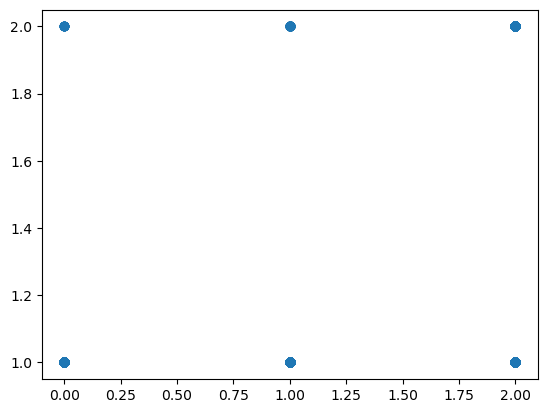

In [75]:
plt.scatter(y_test,ypred22)